<a href="https://colab.research.google.com/github/MiitaliGupta/MachineLearning/blob/main/Simple%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Linear Regression

Team 3

Mitali Gupta 2041153
vaibhav Gupta 2041138
Ayushman Gurung 2041107
Shareqa Tasneem 2041065
shreeya Bajpai 2041061

In [ ]:
import numpy as np
import matplotlib.pyplot as mtp  
import pandas as pd 
from sklearn import datasets

##Dataset from sklearn


In [ ]:
dataset= datasets.load_diabetes()
dataset

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, b

###Data Description

In [ ]:
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

###Dataframe

In [ ]:
df = pd.DataFrame(dataset.data)
df

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


###Assigning Column Names

In [ ]:
df.columns = dataset.feature_names

In [ ]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


##Dependent and Independent Variables

In [ ]:
#Independent Variable (Serum s6 level)
x= df.iloc[:,9].values
#Dependent Variable (Glucose Level)
y= dataset.target
# print("Serum  (Independent) : ",x) 
# print("\n\nGlucose Level (Dependent) : ",y) 

In [ ]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=0)  

In [ ]:
# print(x_test)

In [ ]:
#reshaping of data set
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

**reshape() function** allows us to reshape an array in Python. Reshaping basically means, changing the shape of an array. And the shape of an array is determined by the number of elements in each dimension. Reshaping allows us to add or remove dimensions in an array

**Parameters :** 

1st parameter is the dimension of required array (eg. 1D, 2D, etc).

*-1 in reshape function is used when you dont know or want to explicitly tell the dimension of that axis.*

2nd parameter denotes number of columns per dimension

*In this case we have only one column, i.e. ,Serum level for x and Glucose level for y*

In [ ]:
# print(x_test)

In [ ]:
#Feature Scaling of datasets  
from sklearn.preprocessing import StandardScaler  
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)  
x_test= st_x.transform(x_test)  

In [ ]:
#Fitting the Simple Linear Regression model to the training dataset  
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train)  #takes 2D arrays as parameter

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Prediction of Training set result   
x_pred= regressor.predict(x_train)  
# Predicting the Test set results
y_pred = regressor.predict(x_test)

print('Coefficient : ', regressor.coef_)
print('Intercept : ', regressor.intercept_)
# The mean squared error
print("Mean squared error: %.2f" %mean_squared_error(y_test,y_pred))
# R2 Score
print('R2 score: %.2f' %r2_score(y_test, y_pred))

Coefficient :  [[29.88056569]]
Intercept :  [151.60623229]
Mean squared error: 4369.36
R2 score: 0.15


####Accuracy Interpretation

**Mean Squared Error :** Lower the value, more accurate the model will be.

**Variance Score or R2 Score :** Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

*Note : variance and variance score is different*

###Visualization

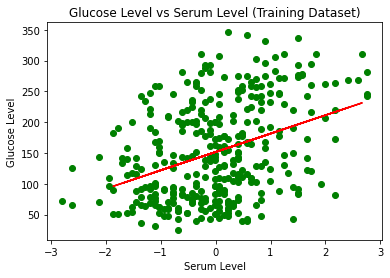

In [ ]:
mtp.scatter(x_train, y_train, color="green")   
mtp.plot(x_test, y_pred, color="red")     
# mtp.plot(x_test, y_test, color="blue")     
mtp.title("Glucose Level vs Serum Level (Training Dataset)")  
mtp.xlabel("Serum Level")  
mtp.ylabel("Glucose Level")  
mtp.show()   

##Dataset 2


In [ ]:
data_set= pd.read_csv('https://raw.githubusercontent.com/MiitaliGupta/MachineLearning/main/Datasets/weights_heights.csv') 
data_set

# Dataset Description : https://www.kaggle.com/datasets/tmcketterick/heights-and-weights

,Index,Height,Weight
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   25000 non-null  int64  
 1   Height  25000 non-null  float64
 2   Weight  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [ ]:
#Independent Variable (Height)
x= data_set.iloc[:,1].values 
#Dependent Variable (Weight) 
y= data_set.iloc[:, 2].values  
print(x) 
print(y) 

[65.78331 71.51521 69.39874 ... 64.69855 67.52918 68.87761]
[112.9925 136.4873 153.0269 ... 118.2655 132.2682 124.874 ]


In [ ]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

In [ ]:
#Reshaping the Data
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [ ]:
#Feature Scaling of datasets  
from sklearn.preprocessing import StandardScaler  
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)  
x_test= st_x.transform(x_test)  

In [ ]:
#Fitting the Simple Linear Regression model to the training dataset  
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train)  #takes 2d arrays as parameter

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

#Prediction of Training set result   
x_pred= regressor.predict(x_train)  
# Predicting the Test set results
y_pred = regressor.predict(x_test)

print('Coefficient : ', regressor.coef_)
print('Intercept : ', regressor.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((regressor.predict(x_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % regressor.score(x_test, y_test))


Coefficient :  [[5.81308847]]
Intercept :  [127.12078484]
Mean squared error: 105.05
R2 score: 0.26


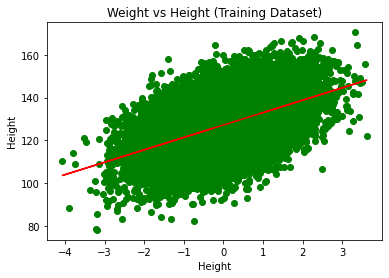

In [ ]:
mtp.scatter(x_train, y_train, color="green")   
mtp.plot(x_train, x_pred, color="red")    
mtp.title("Weight vs Height (Training Dataset)")  
mtp.xlabel("Height")  
mtp.ylabel("Height")  
mtp.show()   